<a href="https://colab.research.google.com/github/rabastos44/Bootcamp-Data-Science-Alura/blob/master/Modulo3/projeto_ricardo_bastos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:


import pandas as pd
from zipfile import ZipFile



caminho = "/content/drive/MyDrive/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(caminho)
caminho_pasta_zipada = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands = ".", decimal = ",")
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [3]:
dados.shape

(16556, 181)

In [4]:
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [6]:
zip.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [7]:
dados.select_dtypes(include="object")

""
0
1
2
3
4
...
16551
16552
16553
16554


In [8]:
dados.select_dtypes(include="float64")

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


In [9]:
dados["VB01001"].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [10]:
dados["VB01001"].value_counts(normalize = True) * 100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

In [11]:
frequencia = dados["VB11007"].value_counts()
frequencia

2     6920
1     4608
4     2326
3     1807
5      714
99     181
Name: VB11007, dtype: int64

In [12]:
percentual = dados["VB11007"].value_counts(normalize = True) * 100
percentual

2     41.797536
1     27.832810
4     14.049287
3     10.914472
5      4.312636
99     1.093259
Name: VB11007, dtype: float64

In [13]:
respostas = {
    1: "Muito satisfeito",
    2: "Satisfeito",
    3: "Indiferente",
    4: "Insatisfeito",
    5: "Muito instisfeito",
    99: "Não Informado"
}
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
dist_freq.rename(index = respostas, inplace = True)
dist_freq.rename_axis("Sentimento em relação ao seu corpo", axis=1, inplace = True)
dist_freq

Sentimento em relação ao seu corpo,Frequência,Percentual
Satisfeito,6920,41.797536
Muito satisfeito,4608,27.832810
Insatisfeito,2326,14.049287
Indiferente,1807,10.914472
Muito instisfeito,714,4.312636
Não Informado,181,1.093259


In [14]:
dados["IMC"] = dados["VB17003"]/ ((dados["VB17004"]/100)**2)
dados["IMC"]

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [15]:
classes = [0, 18.5, 25, 30, 60]
labels = ["abaixo", "normal", "sobrepeso", "obsidade"]

dados["CLASSE_IMC"] = pd.cut(x = dados["IMC"],
       bins = classes,
       labels = labels,
       include_lowest = True)

dados[["IMC", "CLASSE_IMC"]]

,IMC,CLASSE_IMC
0,15.051321,abaixo
1,21.727839,normal
2,18.502907,normal
3,23.322831,normal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,normal
16552,17.930782,abaixo
16553,23.968489,normal
16554,18.995343,normal


In [16]:
frequencia = dados["CLASSE_IMC"].value_counts()
percentual = dados["CLASSE_IMC"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
#dist_freq.rename(index = respostas, inplace = True)
#dist_freq.rename_axis("Sentimento em relação ao seu corpo", axis=1, inplace = True)
dist_freq

,Frequência,Percentual
normal,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obsidade,633,3.823387


In [17]:
import numpy as np
tamanho_amostra = len(dados)

k = int((1 + ((10/3)*np.log10(tamanho_amostra))))
dados["CLASSE_ALTURA"] = pd.cut(x = dados["VB17004"],
       bins = k,
       include_lowest = True)

frequencia = dados["CLASSE_ALTURA"].value_counts()
percentual = dados["CLASSE_ALTURA"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
dist_freq

,Frequência,Percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


In [18]:
dados["VB17004"].min()

124.1

In [19]:
dados["VB17004"].max()

195.3

In [20]:
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = True)
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,0.161996,0.116332
Satisfeito,0.210800,0.207176
Indiferente,0.057381,0.051764
Insatisfeito,0.047475,0.093018
Muito instisfeito,0.015704,0.027422
Não Informado,0.007188,0.003745


In [21]:
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = "columns") * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,32.363944,23.291813
Satisfeito,42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito,9.484735,18.623776
Muito instisfeito,3.137444,5.490386
Não Informado,1.435984,0.749788


In [22]:
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = "index") * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,58.203125,41.796875
Satisfeito,50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito,33.791917,66.208083
Muito instisfeito,36.414566,63.585434
Não Informado,65.745856,34.254144


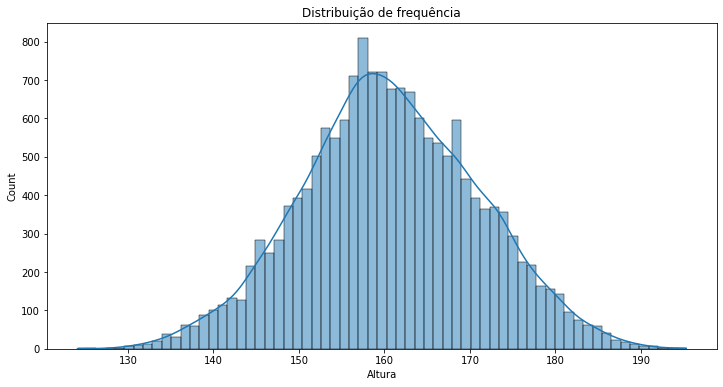

In [23]:
import seaborn as sns

ax = sns.histplot(x = "VB17004", data = dados, kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax

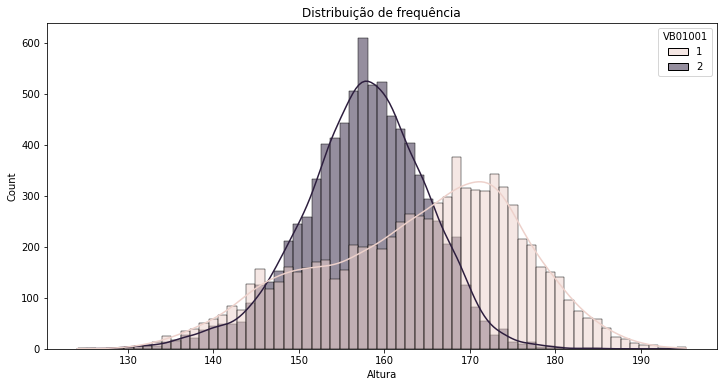

In [24]:
ax = sns.histplot(x = "VB17004", data = dados, kde = True, hue = "VB01001")
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax

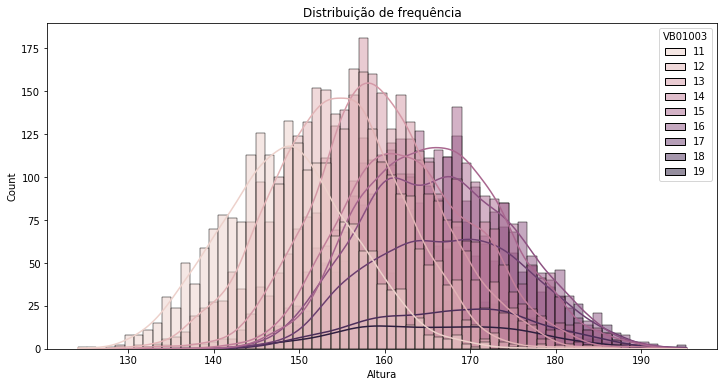

In [25]:
ax = sns.histplot(x = "VB17004", data = dados, kde = True, hue = "VB01003")
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax;

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


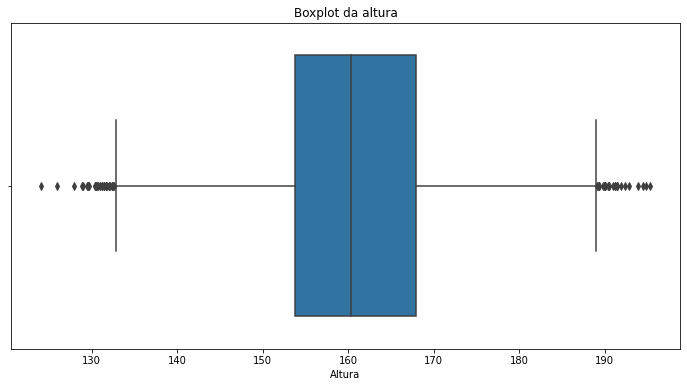

In [26]:
ax = sns.boxplot(dados["VB17004"])
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura")
ax.set_xlabel("Altura")
ax;

In [27]:
dados["VB17004"].quantile(0.75)

167.9

In [28]:
dados["VB17004"].max()

195.3

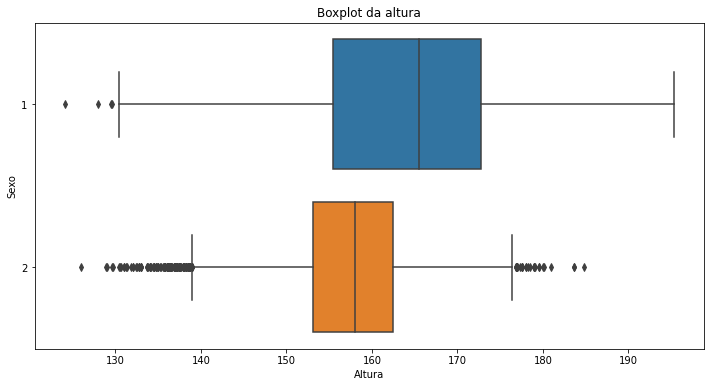

In [29]:
ax = sns.boxplot(x = "VB17004", y = "VB01001", data = dados, orient = "h")
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura")
ax.set_xlabel("Altura")
ax.set_ylabel("Sexo")
ax;

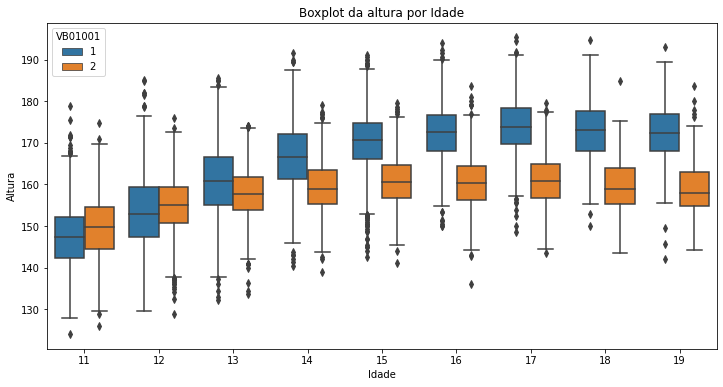

In [30]:
ax = sns.boxplot(x = "VB01003", y = "VB17004", hue = "VB01001", data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura por Idade")
ax.set_ylabel("Altura")
ax.set_xlabel("Idade")
ax;

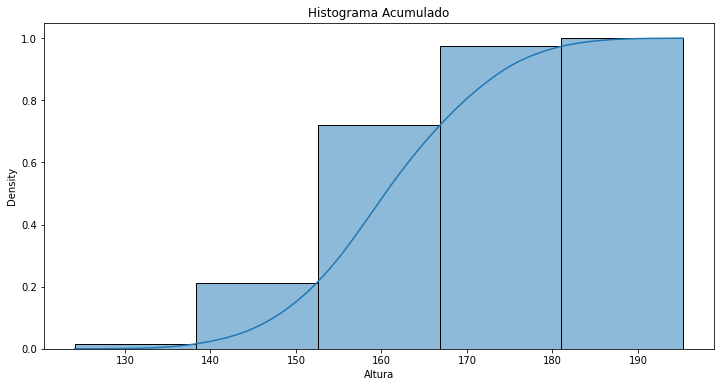

In [31]:
ax = sns.histplot(x = "VB17004", data = dados, 
                  kde = True, 
                  cumulative = True,
                  stat = "density",
                  bins = 5)
ax.figure.set_size_inches(12, 6)
ax.set_title("Histograma Acumulado")
ax.set_xlabel("Altura")
ax

In [32]:
dados["VB17004"].mode()

0    160.0
dtype: float64

In [33]:
dados["VB17004"].mean()

160.71311307078818

In [34]:
dados.groupby("VB01001")["VB17004"].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [35]:
dados.groupby(["VB01001", "VB01003"])["VB17004"].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

In [36]:
salario_thiago = 9000
salario_allan = 1000
salario_medio_ds_alura = (salario_thiago+salario_allan)/2
salario_medio_ds_alura

5000.0

In [37]:
media_altura =  dados["VB17004"].mean()
dados["MEDIA_ALTURA"] = media_altura
diferenca_das_media = dados["VB17004"] - media_altura
dados["DIFERENCA_MEDIA"] = diferenca_das_media

diferenca_quadrado = diferenca_das_media**2
dados["DIFERENCA_QUADRADO"] = diferenca_quadrado

dados[["VB17004", "MEDIA_ALTURA", "DIFERENCA_MEDIA", "DIFERENCA_QUADRADO"]]

,VB17004,MEDIA_ALTURA,DIFERENCA_MEDIA,DIFERENCA_QUADRADO
0,157.0,160.713113,-3.713113,13.787209
1,152.0,160.713113,-8.713113,75.918339
2,161.4,160.713113,0.686887,0.471814
3,172.5,160.713113,11.786887,138.930703
4,167.5,160.713113,6.786887,46.061834
...,...,...,...,...
16551,167.9,160.713113,7.186887,51.651344
16552,185.8,160.713113,25.086887,629.351896
16553,159.4,160.713113,-1.313113,1.724266
16554,157.8,160.713113,-2.913113,8.486228


In [38]:
variancia_amostral = (1/(len(dados)-1)) * dados["DIFERENCA_QUADRADO"].sum()
variancia_amostral

106.91705244049119

In [39]:
106.9105945368652

106.9105945368652

In [40]:
dados["VB17004"].mean()

160.71311307078818

In [41]:
#160.7cm  106.9cm²

In [42]:
desvio_padrao = np.sqrt(variancia_amostral)
desvio_padrao

10.340070233827776

In [43]:
from statsmodels.stats.weightstats import zconfint

zconfint(dados["VB17004"].to_list())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(160.5556082427712, 160.87061789880892)

In [44]:
from statsmodels.stats.weightstats import DescrStatsW

descricao_altura = DescrStatsW(dados["VB17004"])
descricao_altura.tconfint_mean()

(160.55559672649298, 160.8706294150872)

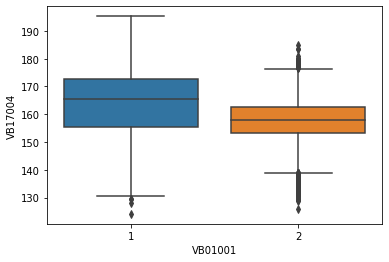

In [45]:
sns.boxplot(x = "VB01001", y = "VB17004", data = dados);

In [46]:
from statsmodels.stats.weightstats import ztest

distribuicao_altura_m = dados.query("VB01001 == 1")["VB17004"]
distribuicao_altura_f = dados.query("VB01001 == 2")["VB17004"]

_ , p_value = ztest(distribuicao_altura_m, distribuicao_altura_m)
p_value

1.0

In [47]:
from scipy.stats import normaltest

_, p_value_normaltest_m = normaltest(distribuicao_altura_m)
_, p_value_normaltest_f = normaltest(distribuicao_altura_f)
print(p_value_normaltest_m)
print(p_value_normaltest_f)

7.695118853996524e-75
7.125189471020874e-47


In [48]:
from scipy.stats import ranksums

ranksums(distribuicao_altura_m, distribuicao_altura_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)

## Desafio 01: Descompactar a pasta zipada usando outro método (Dica Allan, é utilizar comandos Bash).

## Desafio 02: Estudar sobre a base de dados que vamos trabalhar.

## Desafio 03: Classificar algumas perguntas como QualitativaXQuantitativa 

## Desafio 04: Criar uma função para gerar as tabelas de frequência e fazer a análise de outras informações

## Desafio 05: Criar uma tabela de frequência para o peso

## Desafio 06: Criar outros crosstab para analisar e pesquisar sobre o parâmetro aggfunc e testar.

## Desafio 07: Calcular o desvio padrão, média, moda e mediana e plotar no gráfico

## Desafio 08: Fazer a análise com o histograma para outras informações da base de dados.

## DEsafio 09; Pesquisar como é determinado os outliers no boxplot do seaborn.

## Desafio 10: Fazer a descrição de outras variáveis, analisar e compartilhas suas análises no discord

## DEsafio 11: Fazer o calculo da média por sexo e idade, através do crosstap

## Super-desafio 01: Criar um dicionário para facilitar a busca da pergunta.

## Super-desafio 02: De alguma maniera sumarizar as perguntas para ficar mais curta. NLTK, GESIM

## Desafio 12: Estudar as medidas de dispersão e calcular utilizando o pandas, realizar os calculas para as outras colunas numéricas.

## Desafio 13: O que intervalo de confiaça, nível de confiança e o que significancia.

## Desafio 14: Plotar o intervalo de confiança no histograma das alturas.

## Desafio 15: Realizar os testes de hipóteses de outras e explorar a base de dados

#### Desafio 4

In [49]:
import numpy as np

def tabela_de_frequencia_quantitativa(dados):
  tamanho_amostra = len(dados)

  k = int((1 + ((10/3)*np.log10(tamanho_amostra))))
  tabela = pd.cut(x = dados,
       bins = k,
       include_lowest = True)

  frequencia = tabela.value_counts()
  percentual = tabela.value_counts(normalize = True) * 100
  dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
  return dist_freq

res = tabela_de_frequencia_quantitativa(dados["VB17004"])
res.head(4)

,Frequência,Percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739


In [50]:
def tabela_de_frequencia_qualitativa(dados):
  tamanho_amostra = len(dados)

  frequencia = dados.value_counts()
  percentual = dados.value_counts(normalize = True) * 100
  dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
  return dist_freq

res = tabela_de_frequencia_qualitativa(dados["VB01003"])
res.head(4)

,Frequência,Percentual
12,2634,15.909640
13,2561,15.468712
15,2425,14.647258
16,2270,13.711041


####desafio 5

In [51]:
peso = tabela_de_frequencia_quantitativa(dados["VB17003"])
peso.head()

,Frequência,Percentual
"(46.32, 57.7]",5754,34.754772
"(34.94, 46.32]",3852,23.266489
"(57.7, 69.08]",3724,22.493356
"(69.08, 80.46]",1425,8.607151
"(23.56, 34.94]",927,5.599179


####desafio 6

In [52]:
respostas_11005 = {1:"Muito importante" ,
                   2:"Importante",
                   3:"Pouco importante",
                   4:"Sem importância",
                   99:"Não informado"
                   }
frequencia_cruzada = pd.crosstab(dados["VB11006"], dados["VB01001"], normalize = "columns") * 100
frequencia_cruzada.rename(index = respostas_11005, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11006,,
Muito importante,41.160854,44.636595
Importante,39.338723,40.440198
Pouco importante,13.020393,10.763091
Sem importância,5.249185,3.519168
Não informado,1.230843,0.640948


In [53]:
frequencia_cruzada = pd.crosstab(dados["VB11006"], dados["VB01003"],dados["VB17003"],aggfunc=np.max) 
frequencia_cruzada.rename(index = respostas_11005, inplace = True)
frequencia_cruzada

VB01003,11,12,13,14,15,16,17,18,19
VB11006,,,,,,,,,
Muito importante,107.0,107.7,126.4,113.3,156.5,171.5,169.1,125.2,145.3
Importante,85.9,135.0,103.6,158.2,143.3,112.4,135.7,133.4,104.4
Pouco importante,78.7,113.3,126.2,133.1,155.6,134.5,147.7,112.4,89.3
Sem importância,72.1,87.3,102.7,92.4,104.1,107.0,92.2,122.0,106.5
Não informado,65.6,73.3,96.6,73.9,82.9,75.4,76.2,63.1,82.7


In [54]:
frequencia_cruzada = pd.crosstab(dados["VB11006"], dados["VB01003"],dados["VB17003"],aggfunc=np.mean) 
frequencia_cruzada.rename(index = respostas_11005, inplace = True)
frequencia_cruzada

VB01003,11,12,13,14,15,16,17,18,19
VB11006,,,,,,,,,
Muito importante,42.679406,47.035246,51.416741,54.907469,58.752412,59.970400,62.731220,62.599194,65.979006
Importante,43.698837,48.334564,52.115784,56.335798,59.529307,60.803499,62.675507,64.322609,63.832031
Pouco importante,42.417797,49.022491,53.089241,58.880534,60.565732,62.714182,65.613408,64.675862,61.484848
Sem importância,41.068468,48.410156,52.989262,57.306731,58.182716,63.194667,65.446154,67.448000,73.750000
Não informado,45.259259,45.600000,52.151724,53.194444,59.345455,59.787500,60.671429,50.250000,62.080000


In [55]:
frequencia_cruzada = pd.crosstab(dados["VB11006"], dados["VB09009"],normalize="index", ) 
frequencia_cruzada.rename(index = respostas_11005, inplace = True)
frequencia_cruzada

VB09009,1,2,3,4,5,99
VB11006,,,,,,
Muito importante,0.727682,0.094762,0.067587,0.029569,0.074768,0.005632
Importante,0.759388,0.096457,0.066475,0.028165,0.046790,0.002726
Pouco importante,0.771458,0.080244,0.067547,0.026917,0.051295,0.002539
Sem importância,0.709366,0.071625,0.061983,0.038567,0.101928,0.016529
Não informado,0.290323,0.019355,0.051613,0.077419,0.077419,0.483871


####Desafio7

In [56]:

media = dados[dados["VB01001"]==1]["VB17004"].mean()
moda = dados[dados["VB01001"]==1]["VB17004"].mode()
mediana = dados[dados["VB01001"]==1]["VB17004"].median()
desvio_padrao = dados[dados["VB01001"]==1]["VB17004"].std()

<BarContainer object of 3 artists>

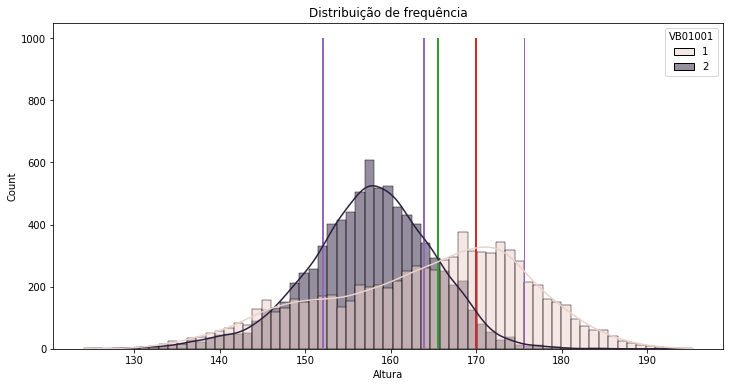

In [57]:
ax = sns.histplot(x = "VB17004", data = dados, kde = True, hue = "VB01001")
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax.bar(x=mediana, height=1000, width=0.2, label="mediana")
ax.bar(x=moda, height=1000, width=0.2, label="moda")
ax.bar(x=[media,media+desvio_padrao,media-desvio_padrao], height=1000, width=0.2)


####desafio 8

Text(0.5, 0, 'Peso')

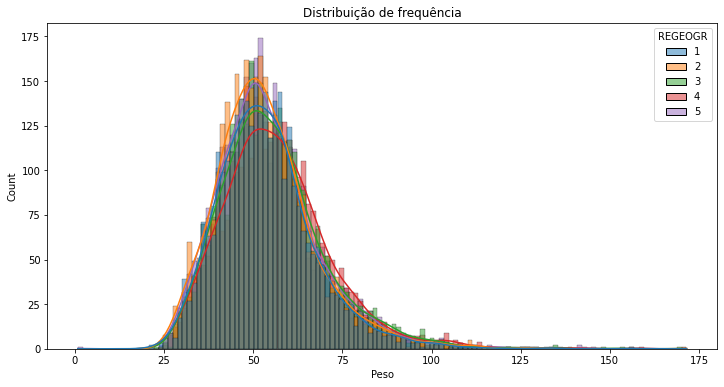

In [58]:
ax = sns.histplot(x = "VB17003", data = dados, kde = True, hue = "REGEOGR", palette="tab10")
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Peso")

Peso por região parece ter uma leve diferença entre regiões

Text(0.5, 0, 'Peso')

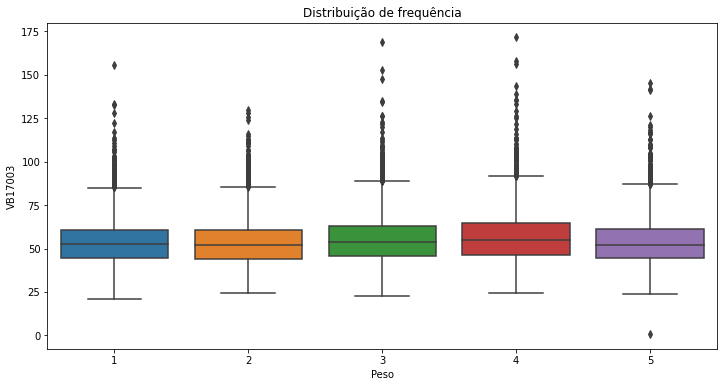

In [59]:
ax = sns.boxplot(y = "VB17003",x="REGEOGR", data = dados, palette="tab10", )
ax.figure.set_size_inches(12, 6)

ax.set_title("Distribuição de frequência")
ax.set_xlabel("Peso")

####desafio 9
Os outliers são definidos em função ao interquartis 
{Q3-Q1} no caso o parametro whis*{Q3-Q1}, o padrão é whis=1,5


####desafio 10 Discord

####desafio 11

In [60]:
pd.crosstab(index=  dados["VB01003"], columns= dados["VB01001"],values=dados["VB17003"],aggfunc=np.mean) 


VB01001,1,2
VB01003,,
11,42.530893,43.310605
12,47.016019,48.472532
13,52.321407,51.624820
14,57.890739,54.237782
15,62.315036,56.203367
16,64.673558,56.952231
17,67.892061,58.133201
18,67.562281,57.694118
19,69.146842,60.507018


####desafio 12

In [61]:
import pandas as pd
peso = dados["VB17003"] 
tamanho = len(peso)
media = sum(peso)/tamanho
diferenca_das_media_peso = peso - media
diferenca_das_media_peso**2
desvio_padrao_peso = sum(diferenca_das_media_peso**2)/(tamanho-1)
desvio_padrao_peso = np.sqrt(desvio_padrao_peso) 
desvio_padrao_peso

14.547864125282576

In [62]:
dados["VB17003"].std()

14.547864125282576

####Desafio 13

O nível de confiança é a frequência com a qual o intervalo observado contém o parâmetro real de interesse quando o experimento é repetido várias vezes. 

um intervalo observado (calculado a partir de observações) que pode variar de amostra para amostra e que com dada frequência (nível de confiança) inclui o parâmetro de interesse real não observável

o nível de confiança é o complemento do nível de significância. Isto é, um intervalo de confiança de 95% reflete um nível de significância de 0,05


https://pt.wikipedia.org/wiki/Intervalo_de_confian%C3%A7a

####Desafio 14

<BarContainer object of 2 artists>

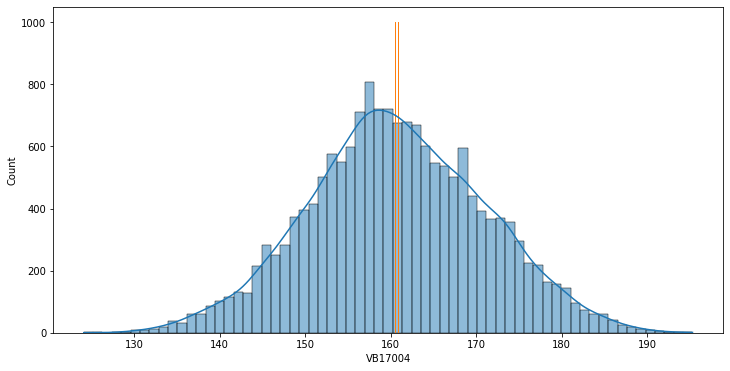

In [63]:
ax = sns.histplot(x = "VB17004", data = dados, kde = True)
ax.figure.set_size_inches(12, 6)
intervalo= zconfint(dados["VB17004"].to_list())
ax.bar(x=intervalo, height=1000, width=0.1)


####Desafio 15

In [64]:
from statsmodels.stats.weightstats import ztest

distribuicao_peso_N = dados.query("REGEOGR == 1")["VB17004"]
distribuicao_peso_NE = dados.query("REGEOGR == 2")["VB17004"]
distribuicao_peso_SE = dados.query("REGEOGR == 3")["VB17004"]
distribuicao_peso_S = dados.query("REGEOGR == 4")["VB17004"]
distribuicao_peso_CO = dados.query("REGEOGR == 5")["VB17004"]


In [65]:
_ , p_value = ztest(distribuicao_peso_NE, distribuicao_peso_SE)
p_value

4.557258897661517e-06

In [66]:
_ , p_value = ztest(distribuicao_peso_NE, distribuicao_peso_N)
p_value

0.25615032382191916

In [67]:
_ , p_value = ztest(distribuicao_peso_S, distribuicao_peso_SE)
p_value

0.6667199924188878

In [68]:
_ , p_value = ztest(distribuicao_peso_CO, distribuicao_peso_SE)
p_value

0.07434714299523586

In [69]:
_ , p_value = ztest(distribuicao_peso_CO, distribuicao_peso_NE)
p_value

0.004405576181221771

In [70]:
_ , pesoN_normaltest_pvalue = normaltest(distribuicao_peso_N )
_ , pesoNE_normaltest_pvalue= normaltest(distribuicao_peso_NE)
_ , pesoSE_normaltest_pvalue= normaltest(distribuicao_peso_SE)
_ , pesoS_normaltest_pvalue= normaltest(distribuicao_peso_S )
_ , pesoCO_normaltest_pvalue= normaltest(distribuicao_peso_CO)

In [71]:
print({"N":pesoN_normaltest_pvalue,"NE":pesoNE_normaltest_pvalue,
       "SE":pesoSE_normaltest_pvalue,"S":pesoS_normaltest_pvalue,
       "CO":pesoCO_normaltest_pvalue})

{'N': 0.936787274763695, 'NE': 0.0930247235178468, 'SE': 0.0005768245937610676, 'S': 0.002288401565161737, 'CO': 0.10038315330846868}
